# Heart Disease Prediction

# Will a patient have a 10 year risk of developing a cardio vascular diseases?

# Packages

In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import scipy.stats as st
plt.style.use('ggplot')

Step 1:

# Loading Data

In [87]:
path=r"C:\Users\sujan\OneDrive\Documents\framingham.csv"
df=pd.read_csv(path)
df.shape

(4240, 16)

There are 4240 rows and 16 columns in our data set.



In [88]:
#to diplay first five rows of data set
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [89]:
df.describe().T

count        mean        std     min     25%    50%     75%  \
male             4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
male               1.0  
age               70.0  
education          4.0  
currentSmoker      1.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
diabetes           1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

# Table of contents

1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)






















 - This is the descriptive statistics of numerical variables .
   - Here Count shows total number. Mean gives average, std is standard deviation value, Min is minimum value, Max is Maximun        value,
   
   25% : First Quantile,
   50% : Median or Second Quantile,
   75% : Third Quantile,

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [91]:
#importing important Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [92]:
#Independent COlumns
# To display list of columns
cat_columns = df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

([],
 ['male',
  'age',
  'education',
  'currentSmoker',
  'cigsPerDay',
  'BPMeds',
  'prevalentStroke',
  'prevalentHyp',
  'diabetes',
  'totChol',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose',
  'TenYearCHD'])

Step 2:

# Missing value Treatment

In [93]:
# checking Missing values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [94]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [95]:
#after dropping null values
df.shape

(3658, 16)

In [96]:
# check for dupicates
df_duplicates=df.duplicated()
df_duplicates.sum()

0

# Handling Outliers

Text(0.5, 1.0, 'Box plot-cigsPerDay')

Text(0.5, 0, 'cigsPerDay')

Text(0.5, 1.0, 'Box plot-totChol')

Text(0.5, 0, 'totChol')

Text(0.5, 1.0, 'Box plot-sysBP')

Text(0.5, 0, 'sysBP')

Text(0.5, 1.0, 'Box plot-diaBP')

Text(0.5, 0, 'diaBP')

Text(0.5, 1.0, 'Box plot-BMI')

Text(0.5, 0, 'BMI')

Text(0.5, 1.0, 'Box plot-heartRate')

Text(0.5, 0, 'heartRate')

Text(0.5, 1.0, 'Box plot-glucose')

Text(0.5, 0, 'glucose')

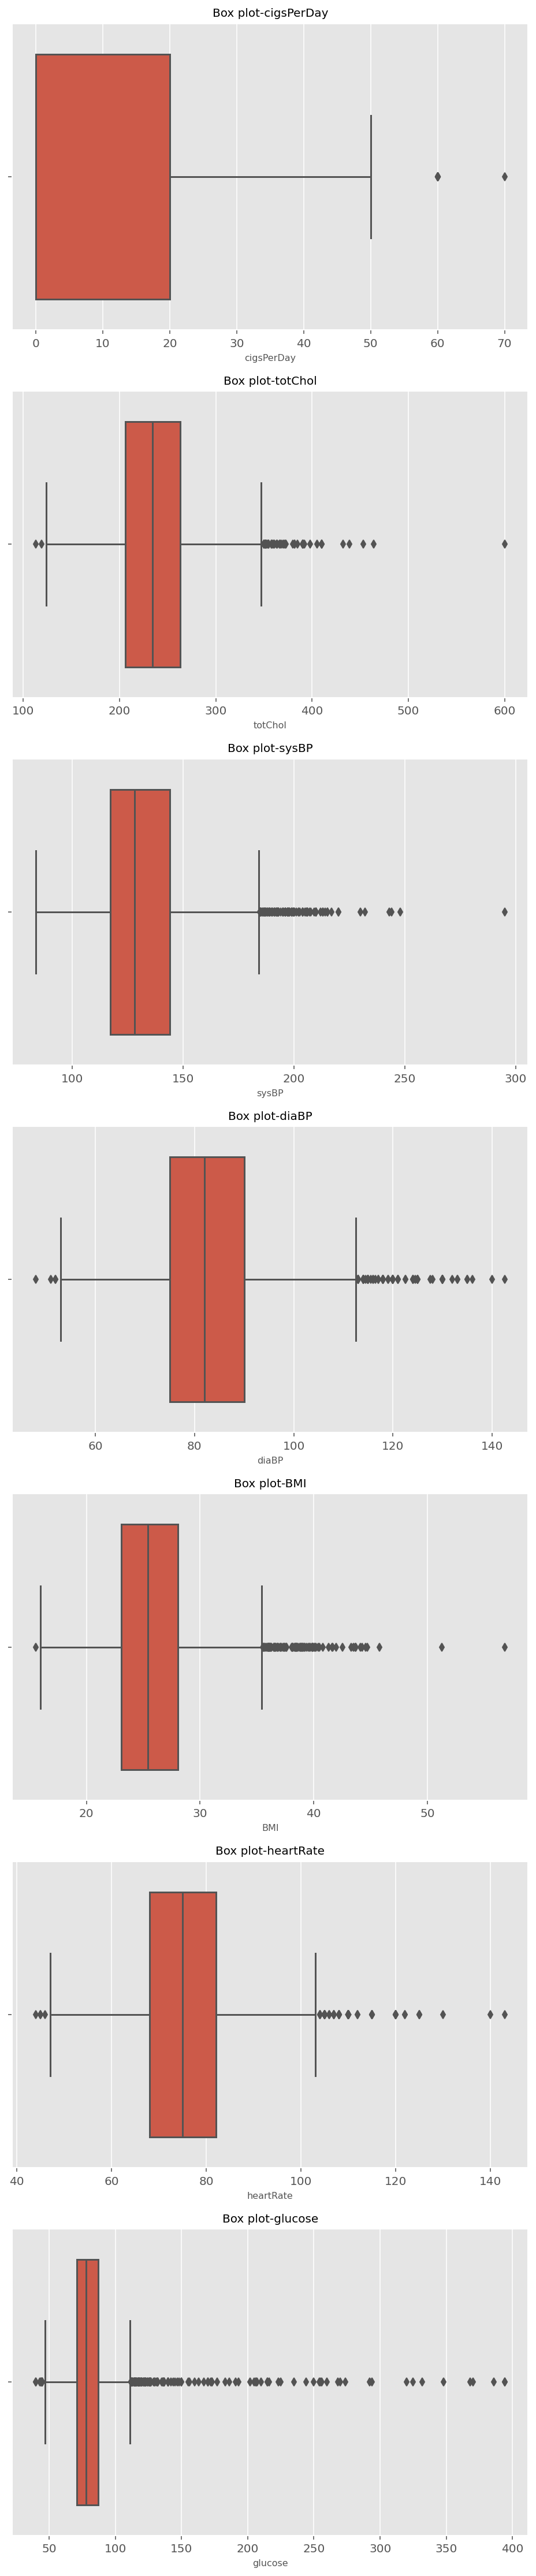

In [97]:
#detecting outliers using boxplot 
col_names=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
fig,ax=plt.subplots(len(col_names),figsize=(8,40))
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],ax=ax[i])
    ax[i].set_title('Box plot-{}'.format(col_val),fontsize=10)
    ax[i].set_xlabel(col_val,fontsize=8)
plt.show()

In [98]:
#Using IQR approach to remove outliers
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
print(IQR)

male                 1.00
age                 23.00
education            3.00
currentSmoker        1.00
cigsPerDay          25.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            110.00
sysBP               53.00
diaBP               29.00
BMI                  9.55
heartRate           31.00
glucose             33.00
TenYearCHD           1.00
dtype: float64


In [99]:
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

       male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4233  False  False      False          False       False   False   
4234  False  False      False          False       False   False   
4237  False  False      False          False       False   False   
4238  False  False      False          False       False   False   
4239  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False    

In [100]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3432, 16)

# EDA

In [101]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Text(0.5, 1.0, 'TenYearCHD Distribution According to Gender')

Text(0, 0.5, 'Number Of Patients')

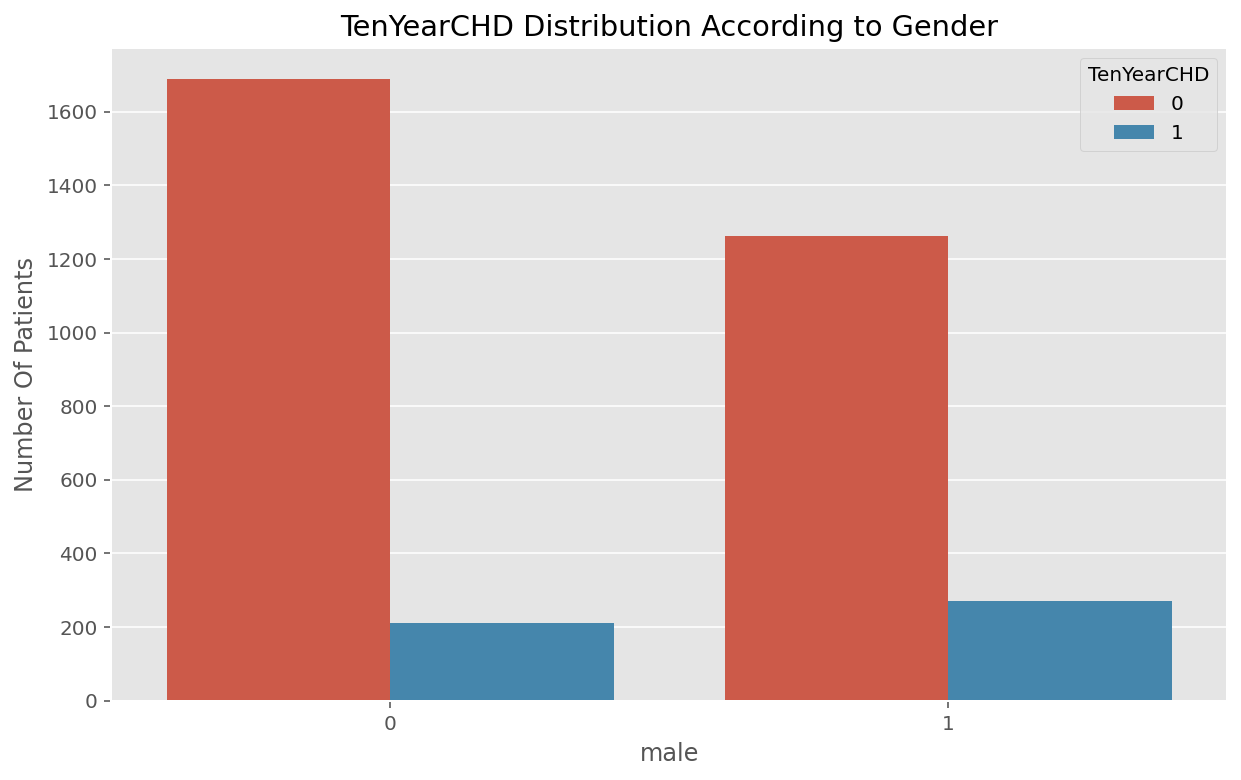

In [102]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='male',hue='TenYearCHD',
             data = df, ax=ax)
plt.title('TenYearCHD Distribution According to Gender')
plt.ylabel('Number Of Patients')
plt.show()

0 - Represents Male, whereas 1 - Represents Female
It can be observed that for both the gender, Majority of the patients are not at risk for occurence of CHD in Ten Years. In comparison to Males, Females are at Higher Risk for CHD in 10 years.

# Univariate Analysis

Plotting between male and TenYearCHD


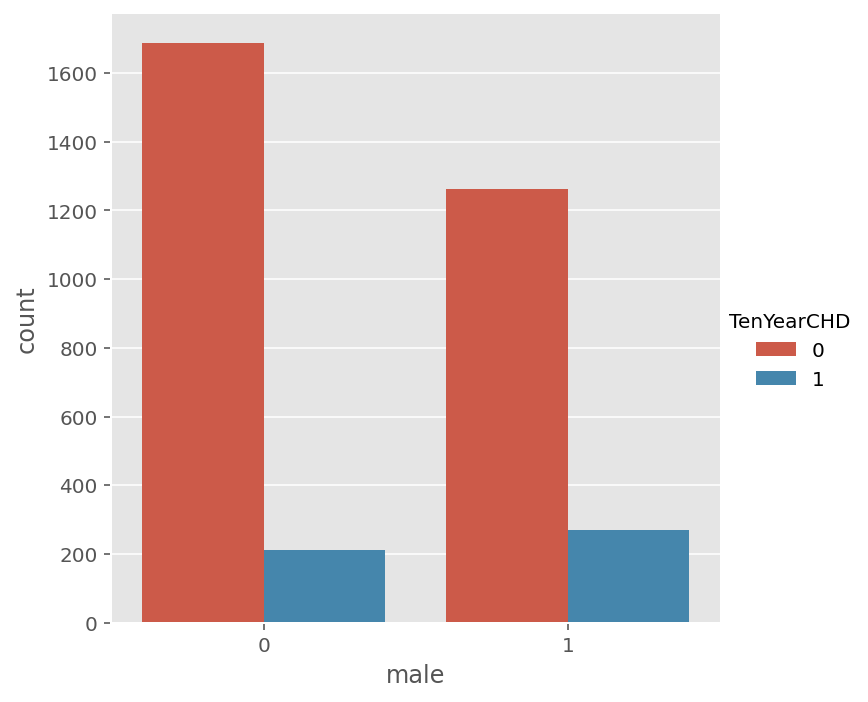

Plotting between education and TenYearCHD


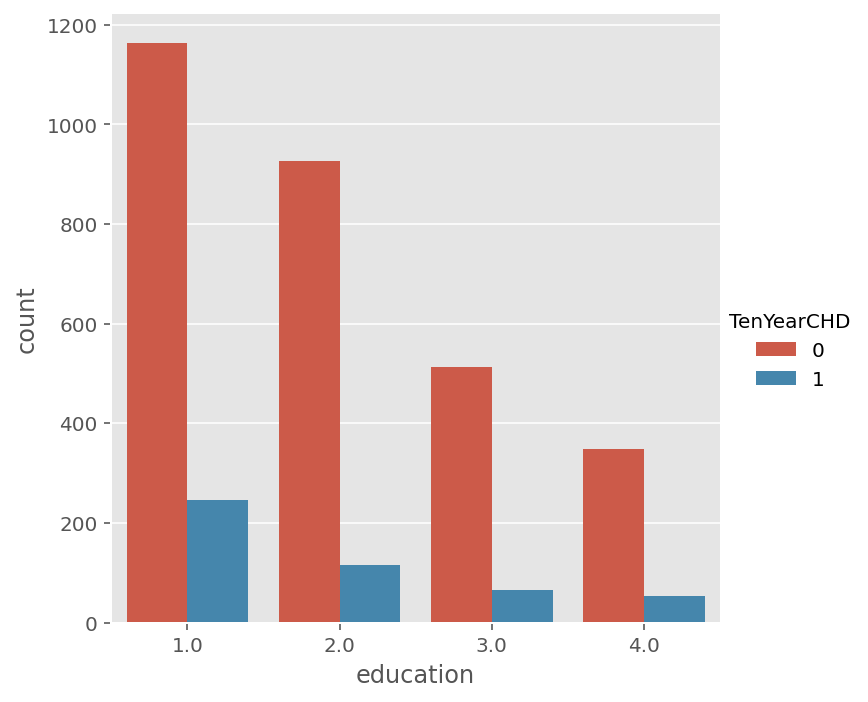

Plotting between currentSmoker and TenYearCHD


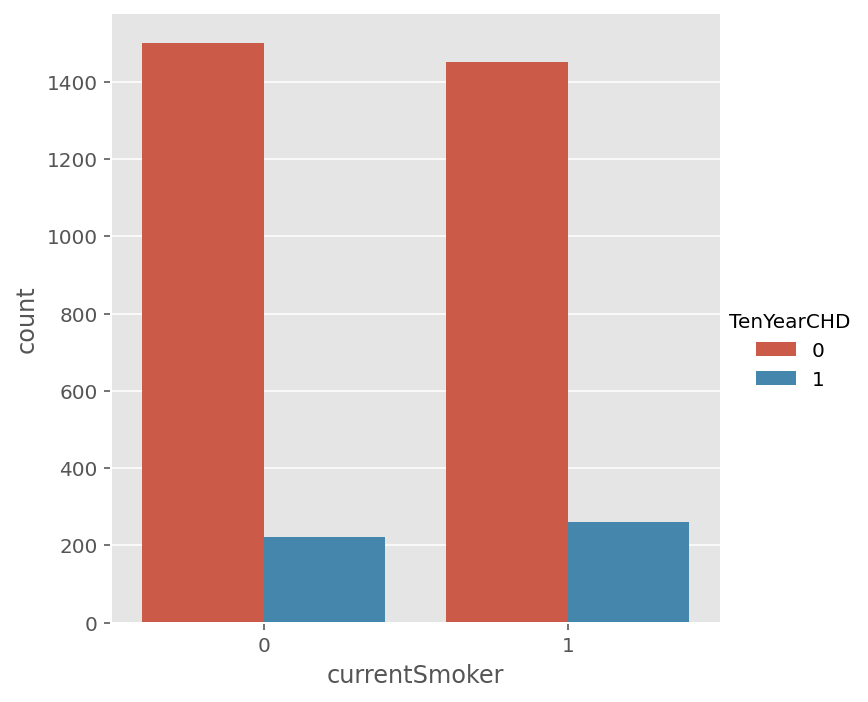

Plotting between BPMeds and TenYearCHD


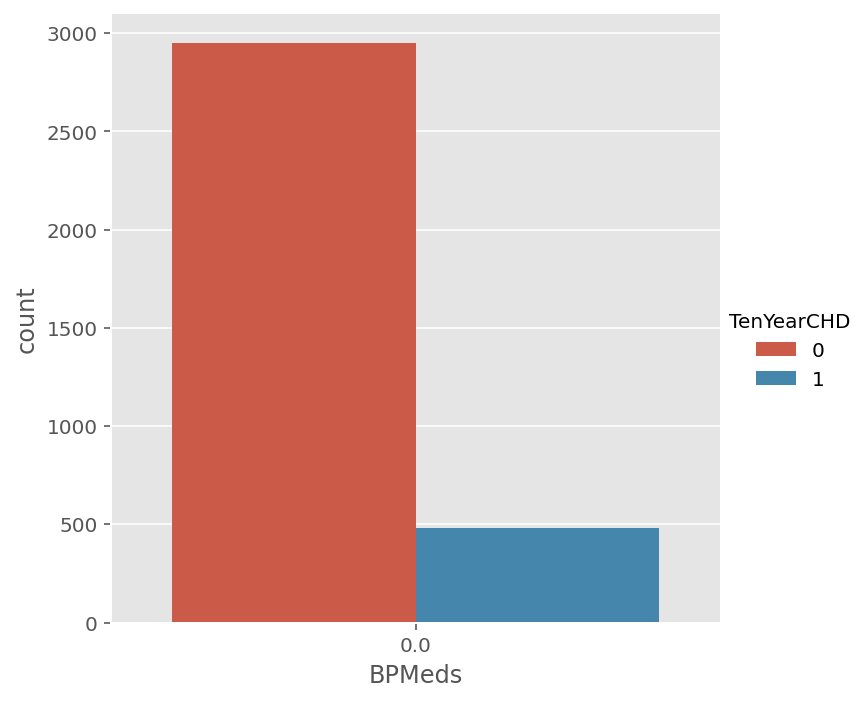

Plotting between prevalentStroke and TenYearCHD


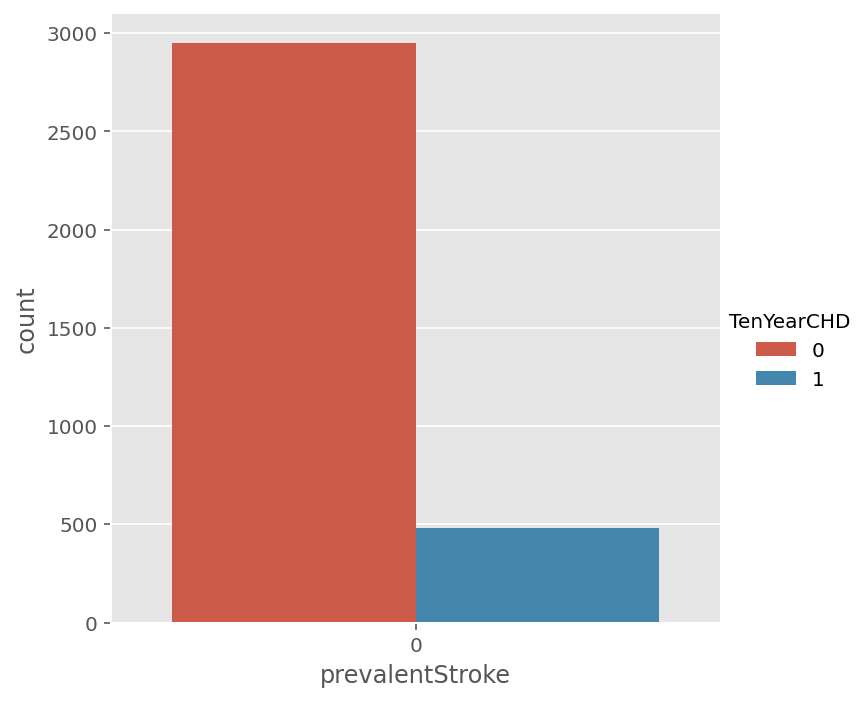

Plotting between prevalentHyp and TenYearCHD


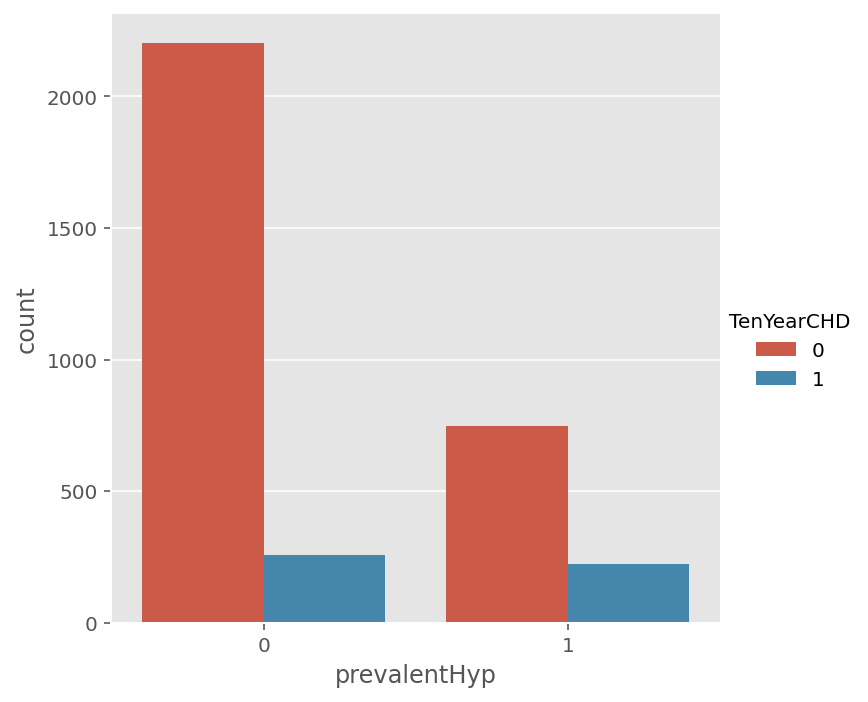

Plotting between diabetes and TenYearCHD


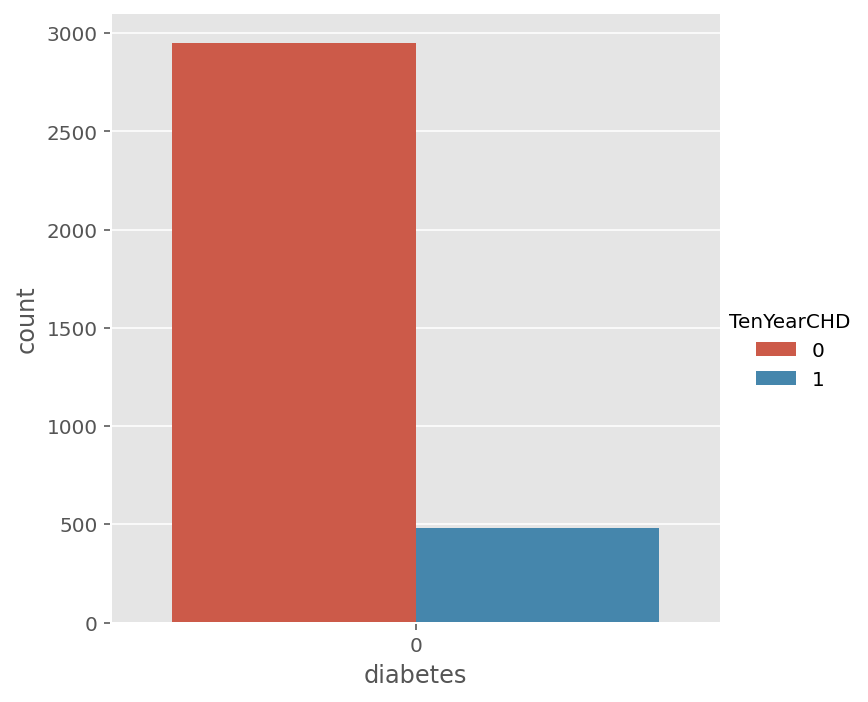

In [103]:
cat_cols=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in cat_cols:
    print("Plotting between" ,i,'and TenYearCHD' )
    sns.catplot(x=i, hue ="TenYearCHD", kind="count",data=df)
    plt.show()

# Bivariate Analysis

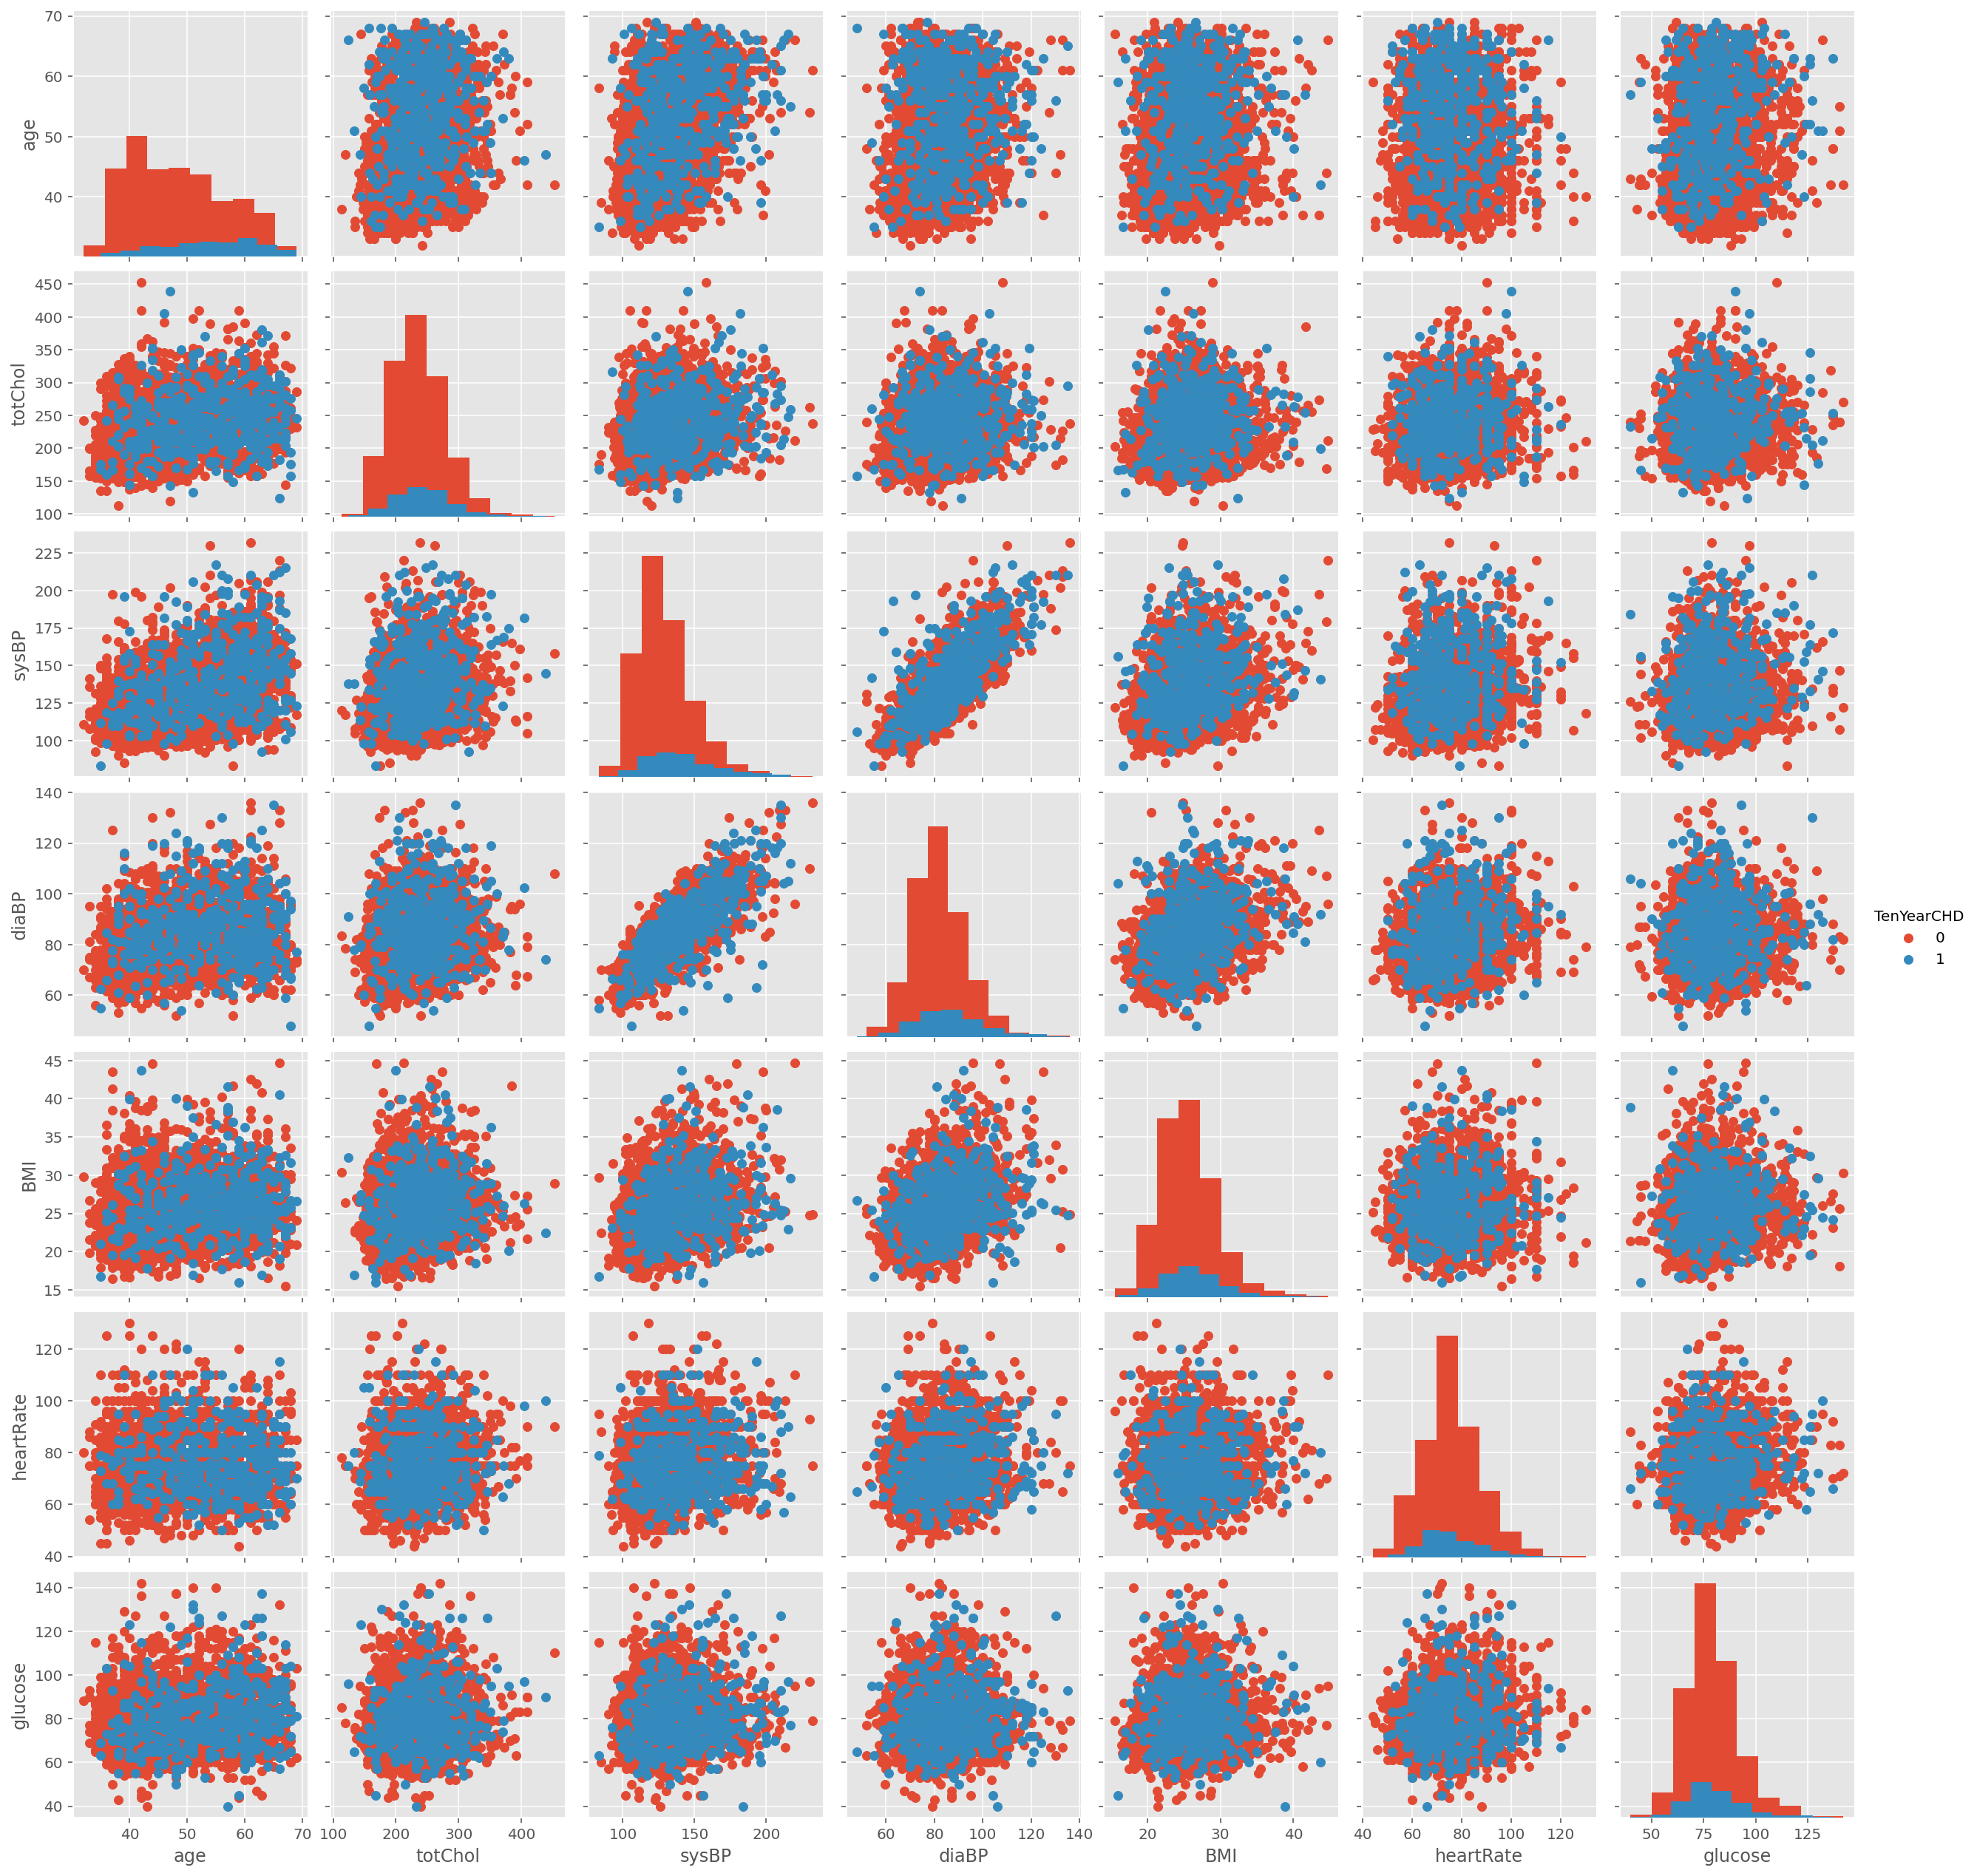

In [104]:
num_cols=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
g=sns.PairGrid(df[num_cols],hue="TenYearCHD")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Numerical Columns Analysis

plotting between totChol and TenYearCHD


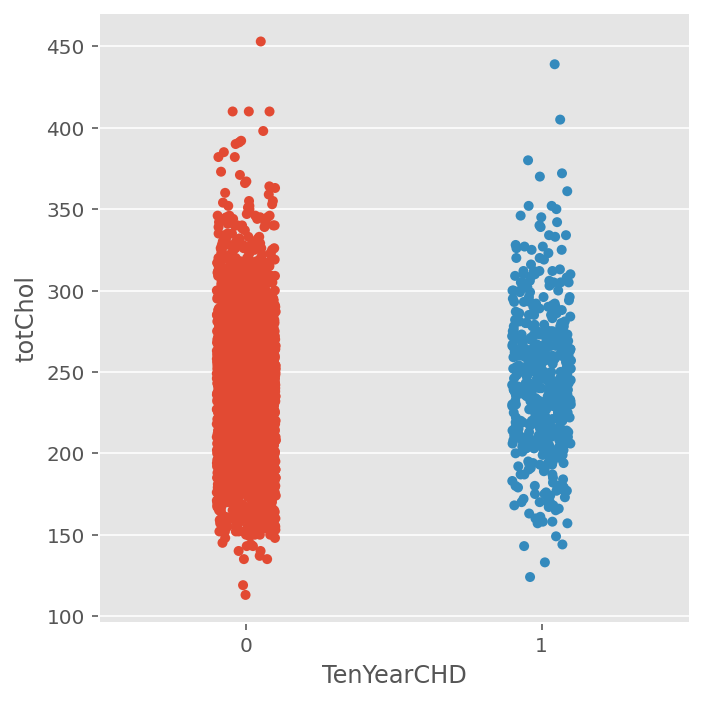

plotting between sysBP and TenYearCHD


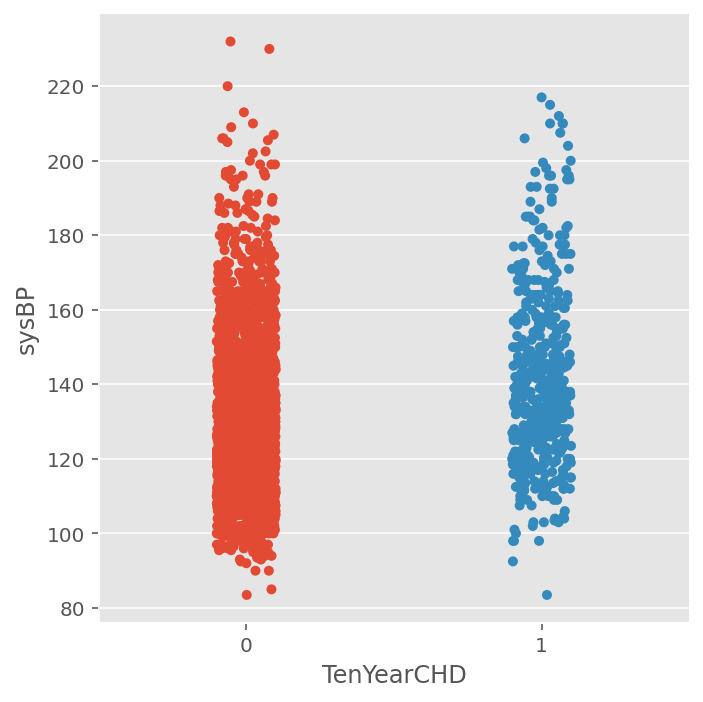

plotting between diaBP and TenYearCHD


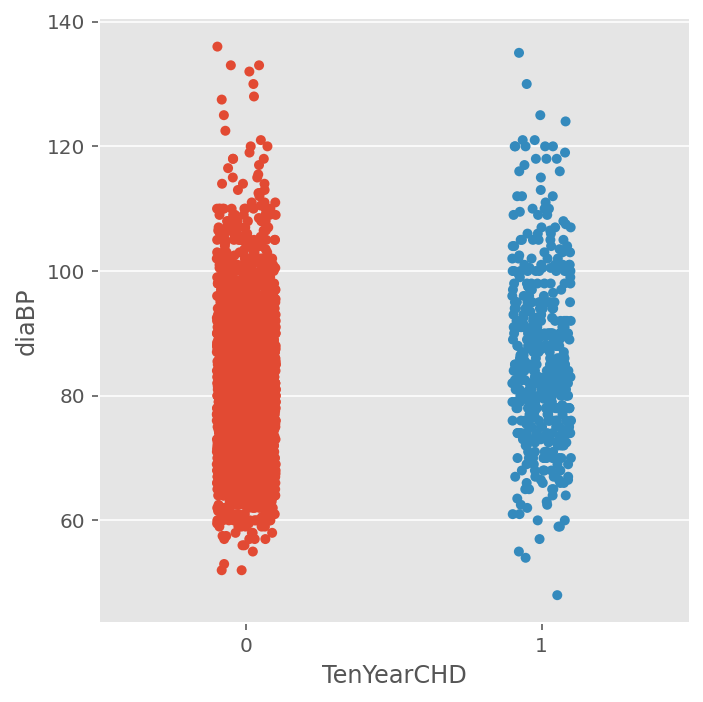

plotting between BMI and TenYearCHD


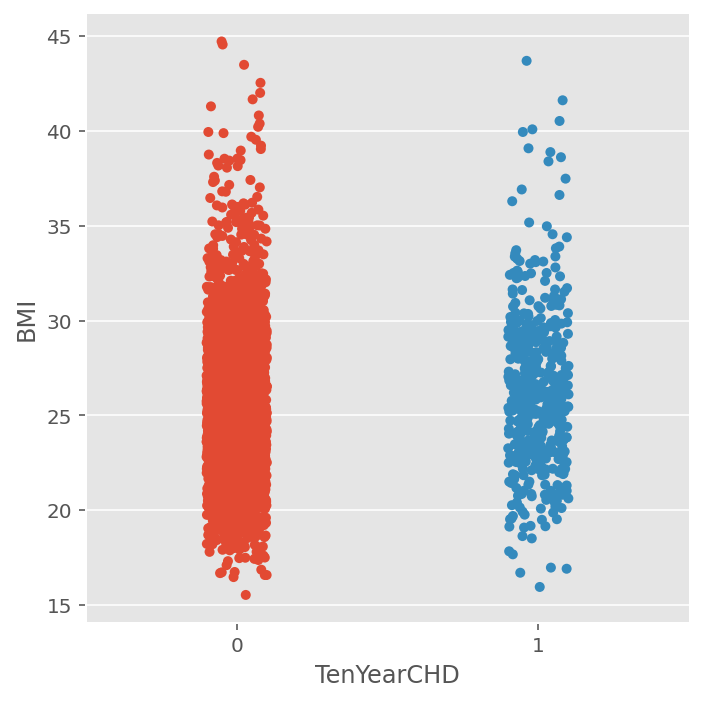

plotting between heartRate and TenYearCHD


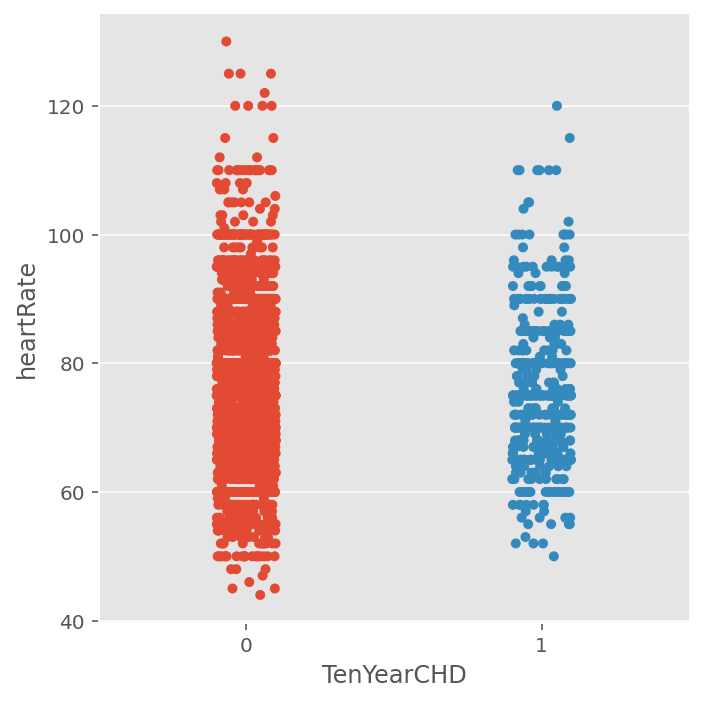

plotting between glucose and TenYearCHD


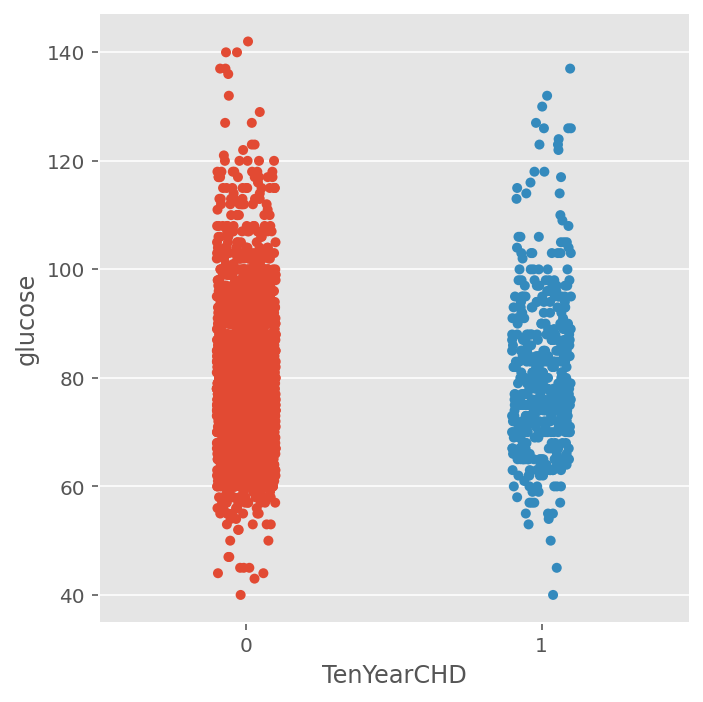

In [105]:
num_cols=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in num_cols:
    print("plotting between", i, 'and TenYearCHD')
    sns.catplot(x="TenYearCHD", y=i, data=df);
    plt.show()

Text(0.5, 1.0, 'TenYearCHD Distribution According to Gender')

Text(0, 0.5, 'Number Of Patients')

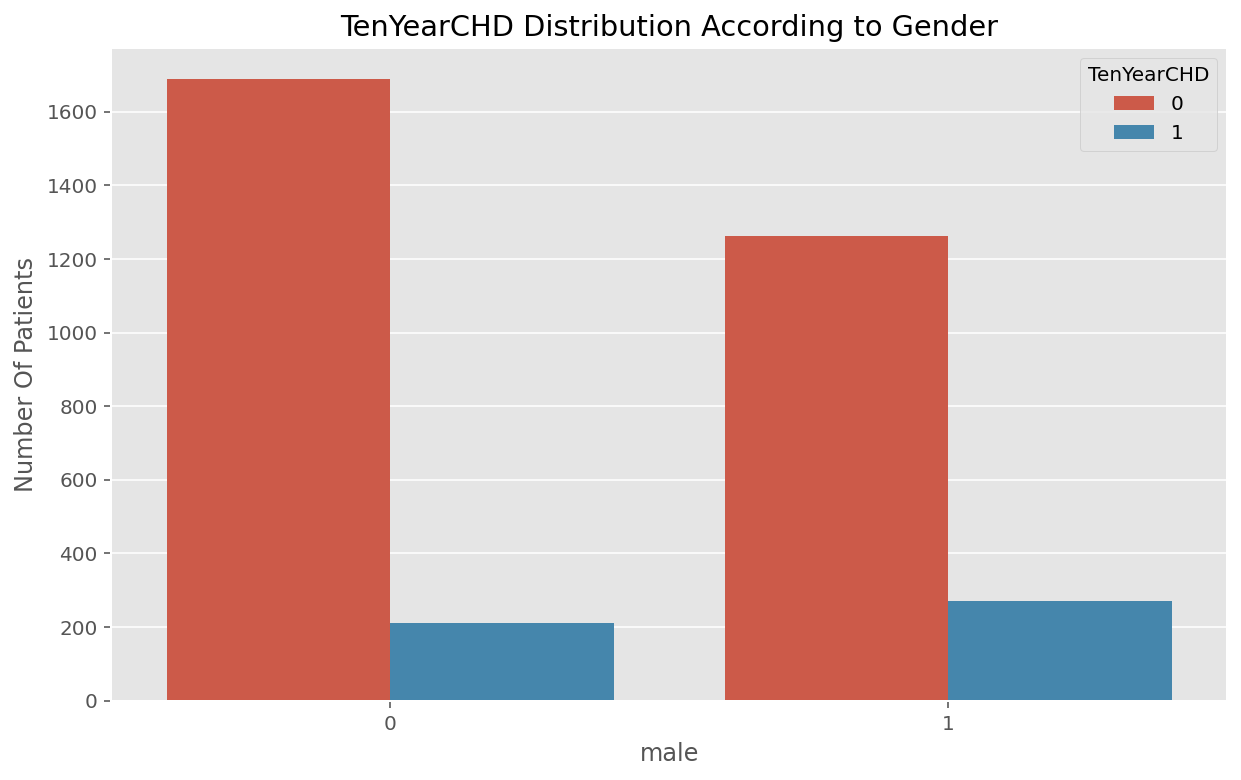

In [106]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='male',hue='TenYearCHD',
             data = df, ax=ax)
plt.title('TenYearCHD Distribution According to Gender')
plt.ylabel('Number Of Patients')
plt.show()

0 - Represents Male, whereas 1 - Represents Female
It can be observed that for both the gender, Majority of the patients are not at risk for occurence of CHD in Ten Years.
In comparison to Males, Females are at Higher Risk for CHD in 10 years.

Text(0.5, 1.0, 'Patient Age Distribution In Relation with CHD Occurence')

Text(0.5, 0, 'Patient Age')

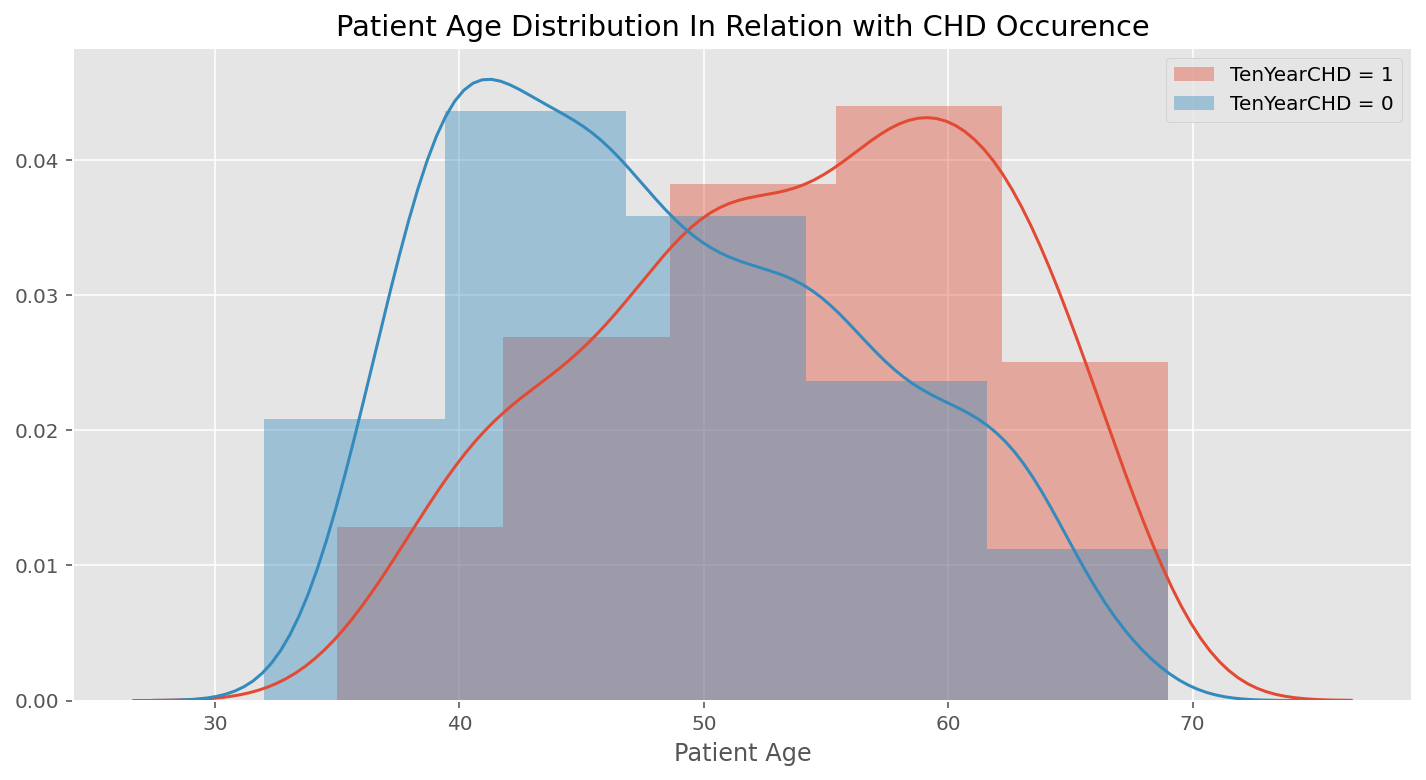

In [107]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.distplot(df[df['TenYearCHD'] == 1]['age'], hist=True, bins=5, ax=ax, label='TenYearCHD = 1')
sns.distplot(df[df['TenYearCHD'] == 0]['age'], hist=True, bins=5, ax=ax, label='TenYearCHD = 0')
plt.title('Patient Age Distribution In Relation with CHD Occurence')
plt.xlabel('Patient Age')
plt.legend()
plt.show()

 It can be observed that, Patients with Age Between 40-50 have Lower Risk of CHD in Ten Years, 
whereas Patients with Age Between 55-62 have Higher Risk of CHD in Ten Years. bold text

Text(0.5, 1.0, 'Relationship Between Systolic and Diastolic Blood Pressure')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

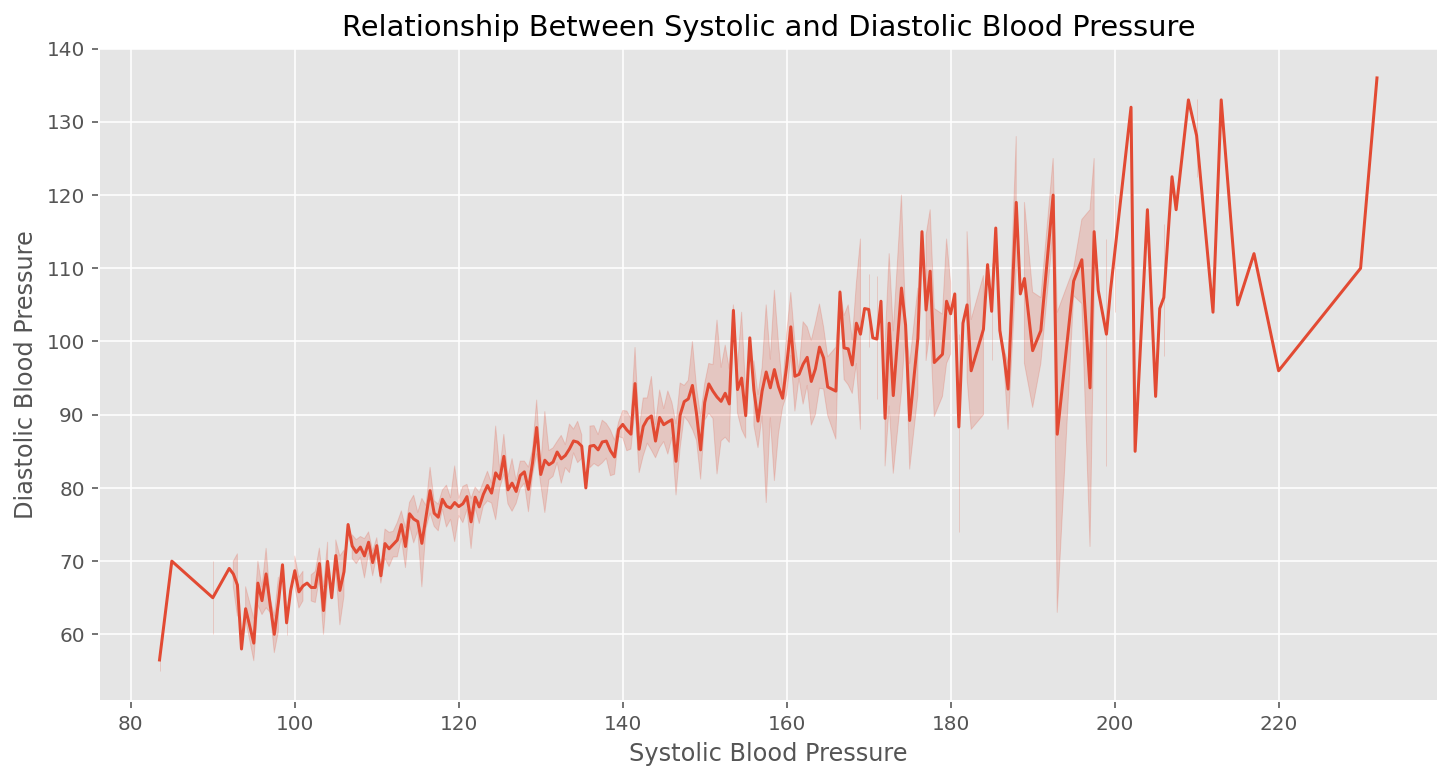

In [109]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(x='sysBP', y='diaBP',
               data=df, ax=ax)
plt.title('Relationship Between Systolic and Diastolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

It can be observed that there is a Postive Correlation between Systlic and Diastolic Blood Pressure.
This means, that increase in Systolic Blood Pressure leads to increase in Diastolic Blood Pressure.

Text(0.5, 1.0, 'Effect of BP On Occurence of CHD')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

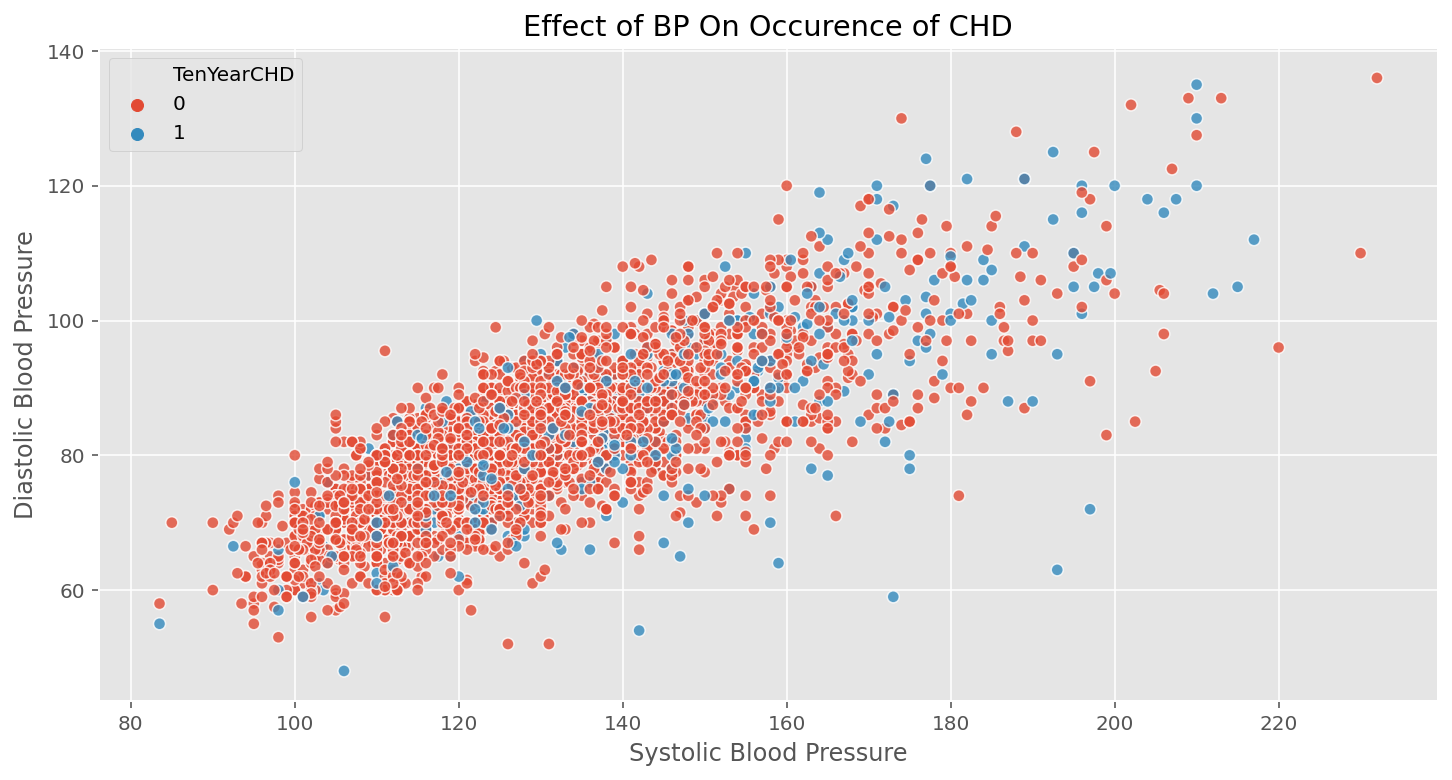

In [111]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD',
               data=df, alpha=0.8, ax=ax)
plt.title('Effect of BP On Occurence of CHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

No relation can be established between BP Level and Occurence of CHD. 
There are no clusters present indicating that rise in BP can lead to occurence of CHD.

Text(0.5, 1.0, 'Distribution Of Cigarettes Per Day')

Text(0.5, 0, 'Cigarettes Per Day')

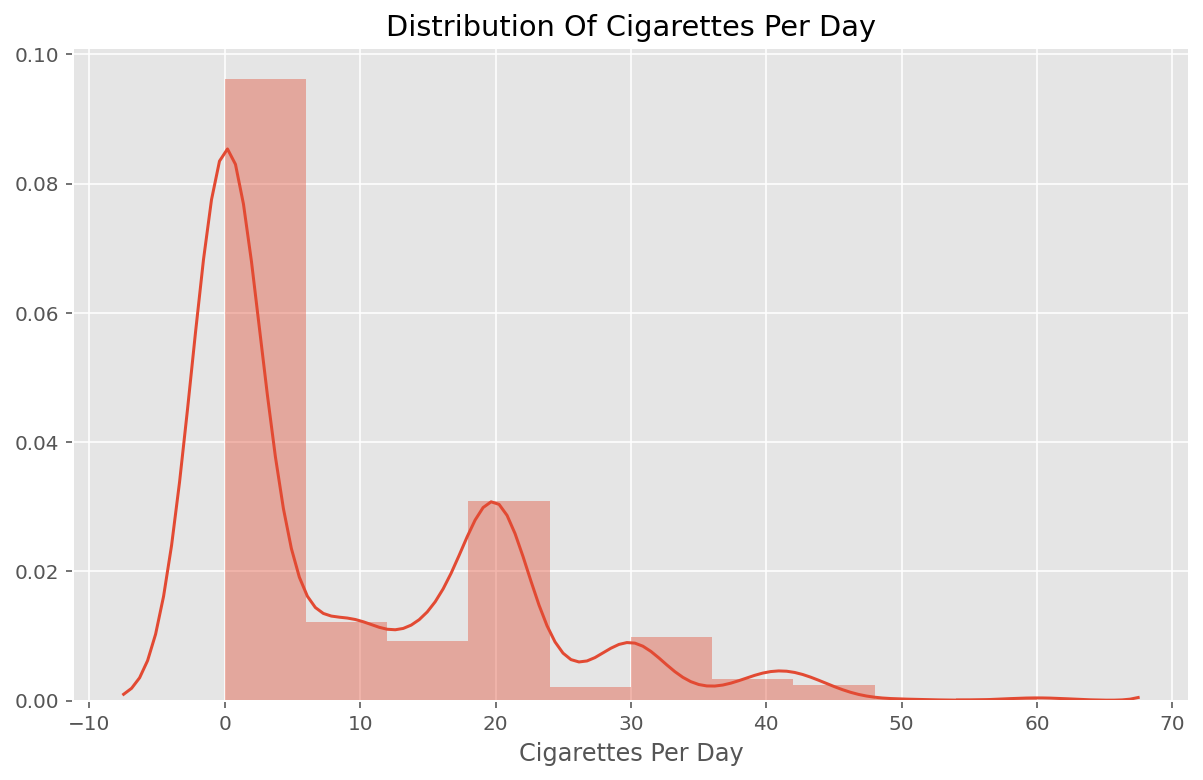

In [112]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.distplot(df['cigsPerDay'], hist=True, bins=10, ax=ax)
plt.title('Distribution Of Cigarettes Per Day')
plt.xlabel('Cigarettes Per Day')
plt.show()

It can be observed that, most of the patients Smoke Zero Cigarettes Per Day.



Text(0.5, 1.0, 'Effect of BP On Occurence of CHD')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

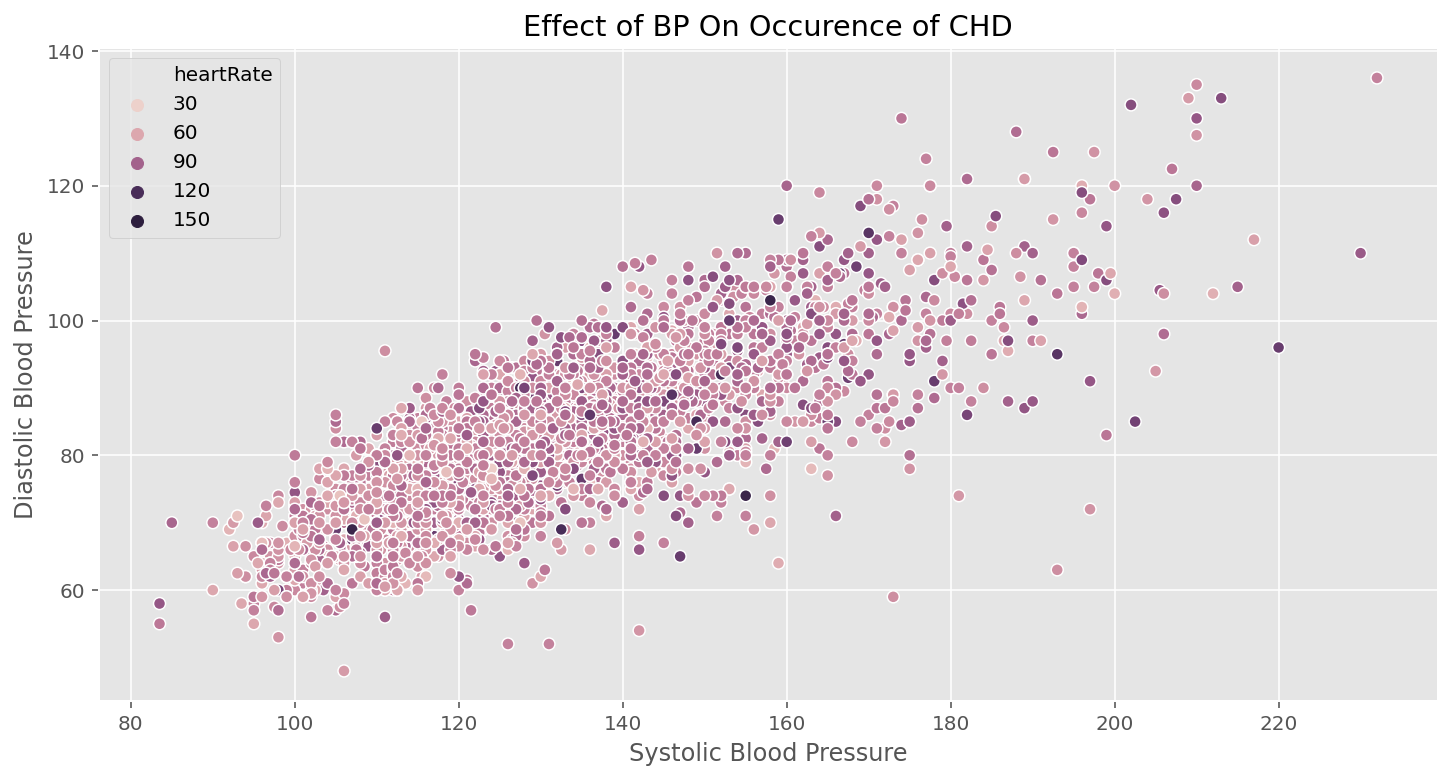

In [113]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='heartRate',
               data=df, alpha=1, ax=ax)
plt.title('Effect of BP On Occurence of CHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

It can be observed that there is Somewhat Positive Correlation between Heart Rate and Systolic & Diastolic Blood Pressure. 
It can be observed that increase in Heart Rate can be observed when there is an increase in Blood Pressure.

[Text(0, 0.5, 'Diastolic Blood Pressure')]

Text(0.5, 1.0, 'Effect of Cholestrol on Diastolic Blood Pressure')

[Text(0, 0.5, 'Systolic Blood Pressure')]

Text(0.5, 1.0, 'Effect of Cholestrol on Systolic Blood Pressure')

Text(0.5, 0, 'Total Cholestrol')

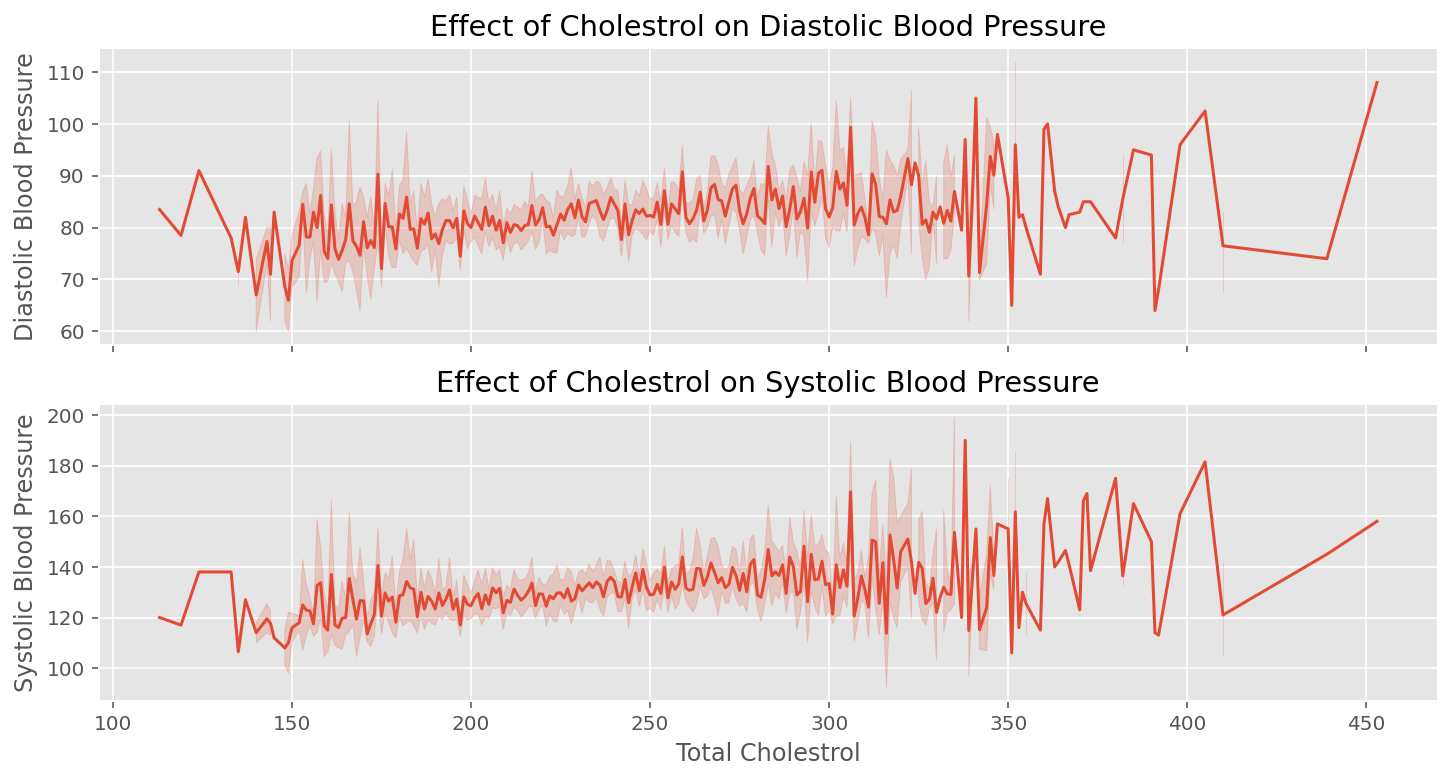

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig = plt.Figure()
sns.lineplot(x='totChol', y='diaBP',
               data=df, ax=ax1)
sns.lineplot(x='totChol', y='sysBP',
            data=df, ax=ax2)
ax1.set(ylabel='Diastolic Blood Pressure')
ax1.set_title('Effect of Cholestrol on Diastolic Blood Pressure')
ax2.set(ylabel='Systolic Blood Pressure')
ax2.set_title('Effect of Cholestrol on Systolic Blood Pressure')
plt.xlabel('Total Cholestrol')
plt.show()

It can observed that Cholestrol Level has no effect on either Systolic or Diastolic Blood Pressure.

Text(0.5, 1.0, 'Effect of BMI On Blood Pressure')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

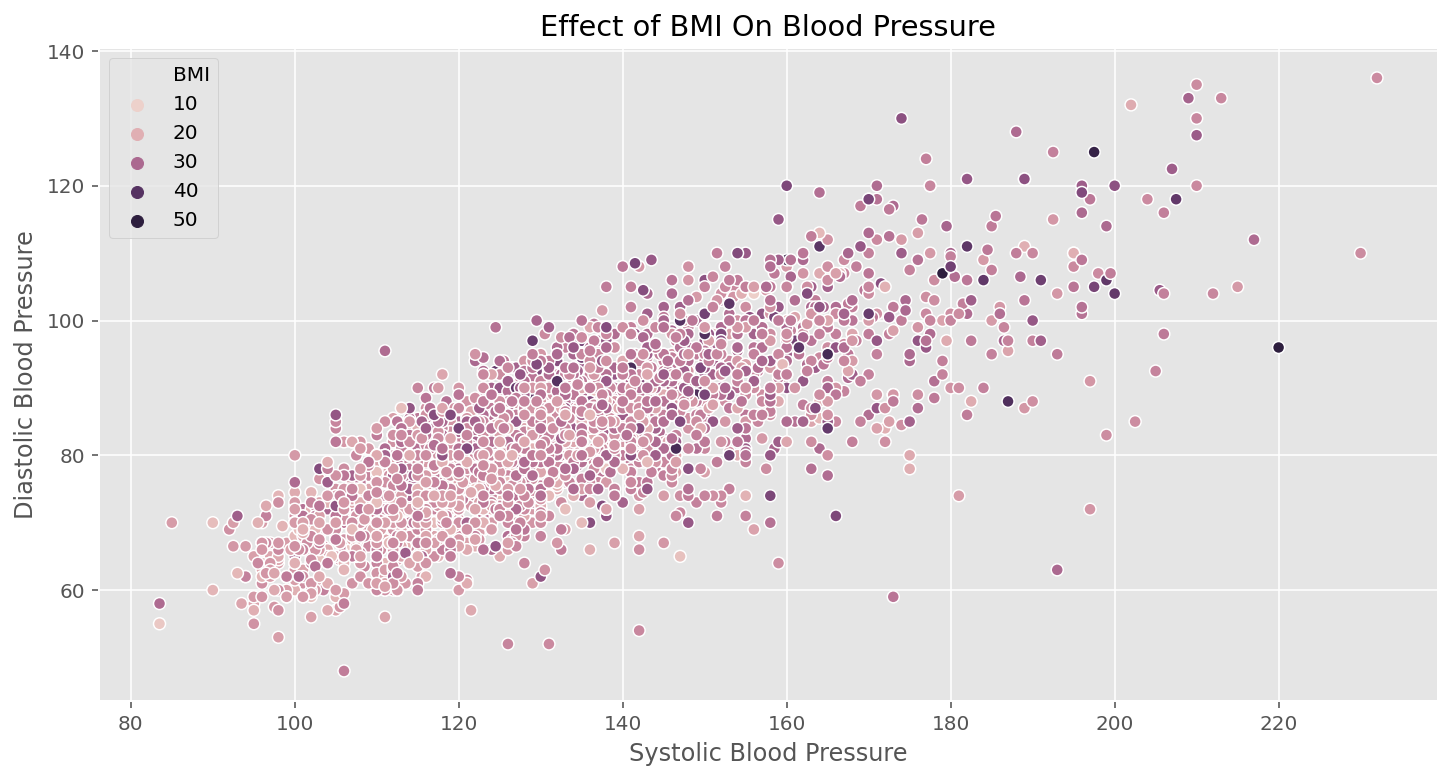

In [115]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='BMI',
               data=df, ax=ax)
plt.title('Effect of BMI On Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

Somewhat Positive Correlation can be observed between the BMI and Systolic as well as Diastolic Blood Pressure.
It can be seen that patients with Higher BMI tend to be clustered with higher BP,
whereas patients with Lower BMI tend to be clustered with lower BP.

Text(0.5, 1.0, 'Effect of Hypertension of Occurence of CHD')

Text(0, 0.5, 'Prevalent Hypertension')

Text(0.5, 0, 'Number of Patients')

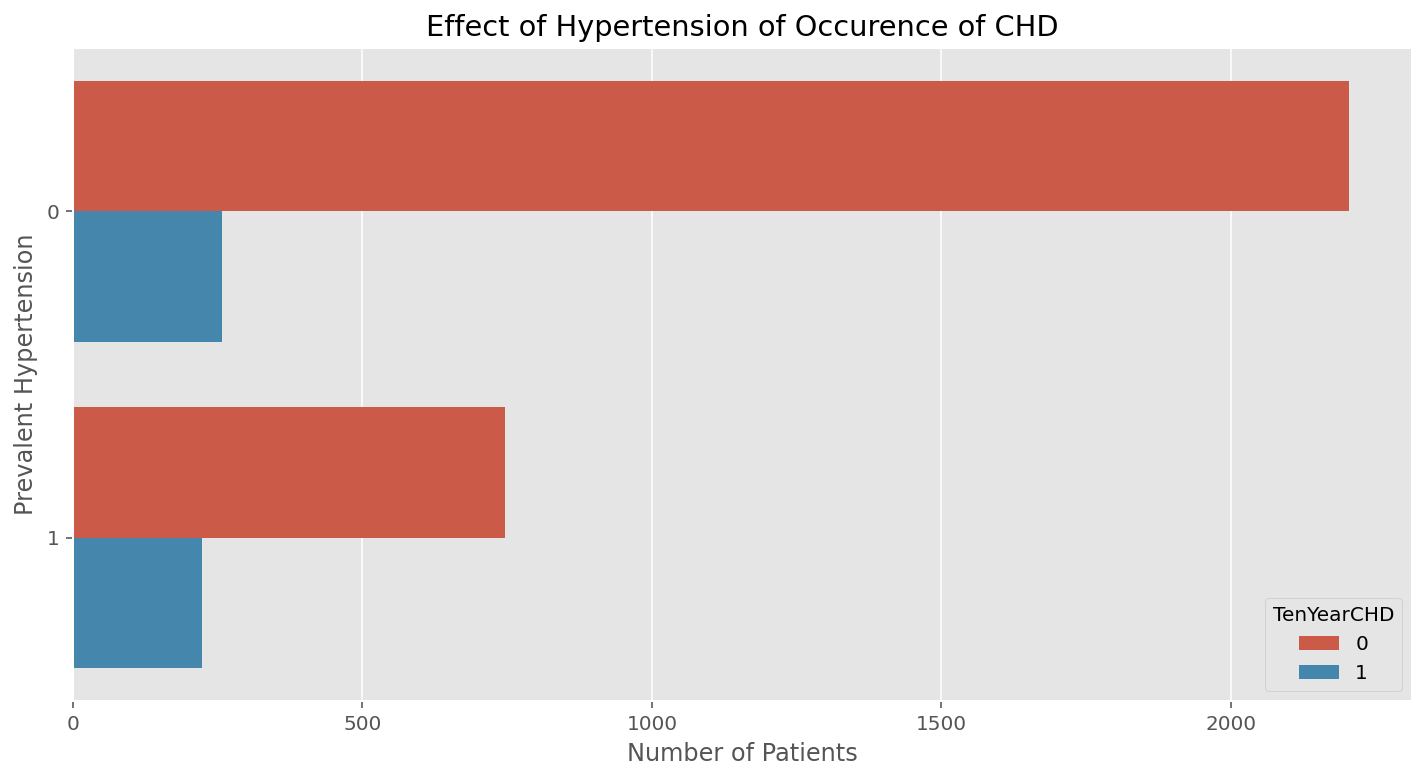

In [116]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(hue='TenYearCHD', y='prevalentHyp',
            data=df, ax=ax)
plt.title('Effect of Hypertension of Occurence of CHD')
plt.ylabel('Prevalent Hypertension')
plt.xlabel('Number of Patients')
plt.show()

It can be seen that, patients with No Prevalent Hypertension are less likely to have the risk of CHD in Ten Years. 
Whereas patients with Prevalent Hypertension are more likely to have CHD in 10 years.

# Feature Selection

In [144]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs        Score
10    TenYearCHD  2951.000000
0          sysBP   472.953716
2            age   252.167910
4     cigsPerDay   247.776695
3        totChol   155.024816
5          diaBP   100.091727
6   prevalentHyp    64.830045
9           male    16.968696
1        glucose    10.092882


In [145]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs        Score
10    TenYearCHD  2951.000000
0          sysBP   472.953716
2            age   252.167910
4     cigsPerDay   247.776695
3        totChol   155.024816
5          diaBP   100.091727
6   prevalentHyp    64.830045
9           male    16.968696
1        glucose    10.092882
7       diabetes          NaN
8         BPMeds          NaN

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

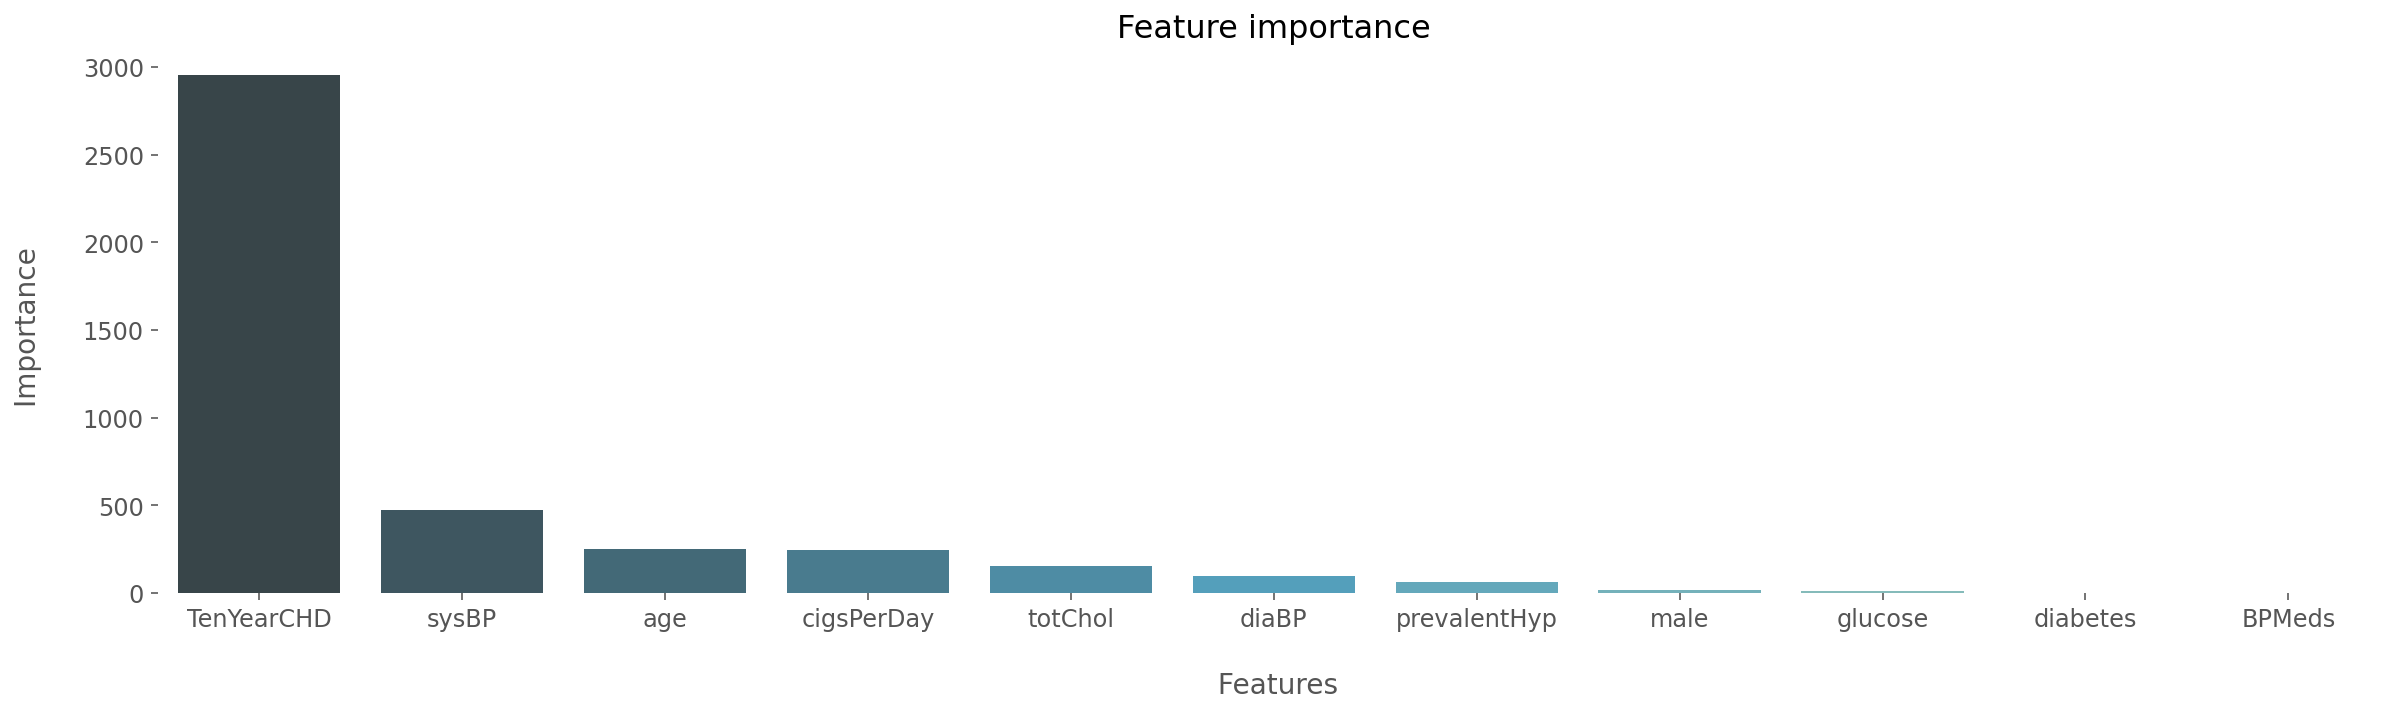

In [146]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [147]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['TenYearCHD',
 'sysBP',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'glucose',
 'diabetes']

In [148]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0         0.0   70.0             0         0   
1  121.0     76.0   46    250.0         0.0   81.0             0         0   
2  127.5     70.0   48    245.0        20.0   80.0             0         0   
3  150.0    103.0   61    225.0        30.0   95.0             1         0   
4  130.0     85.0   46    285.0        23.0   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

<Figure size 1080x576 with 0 Axes>

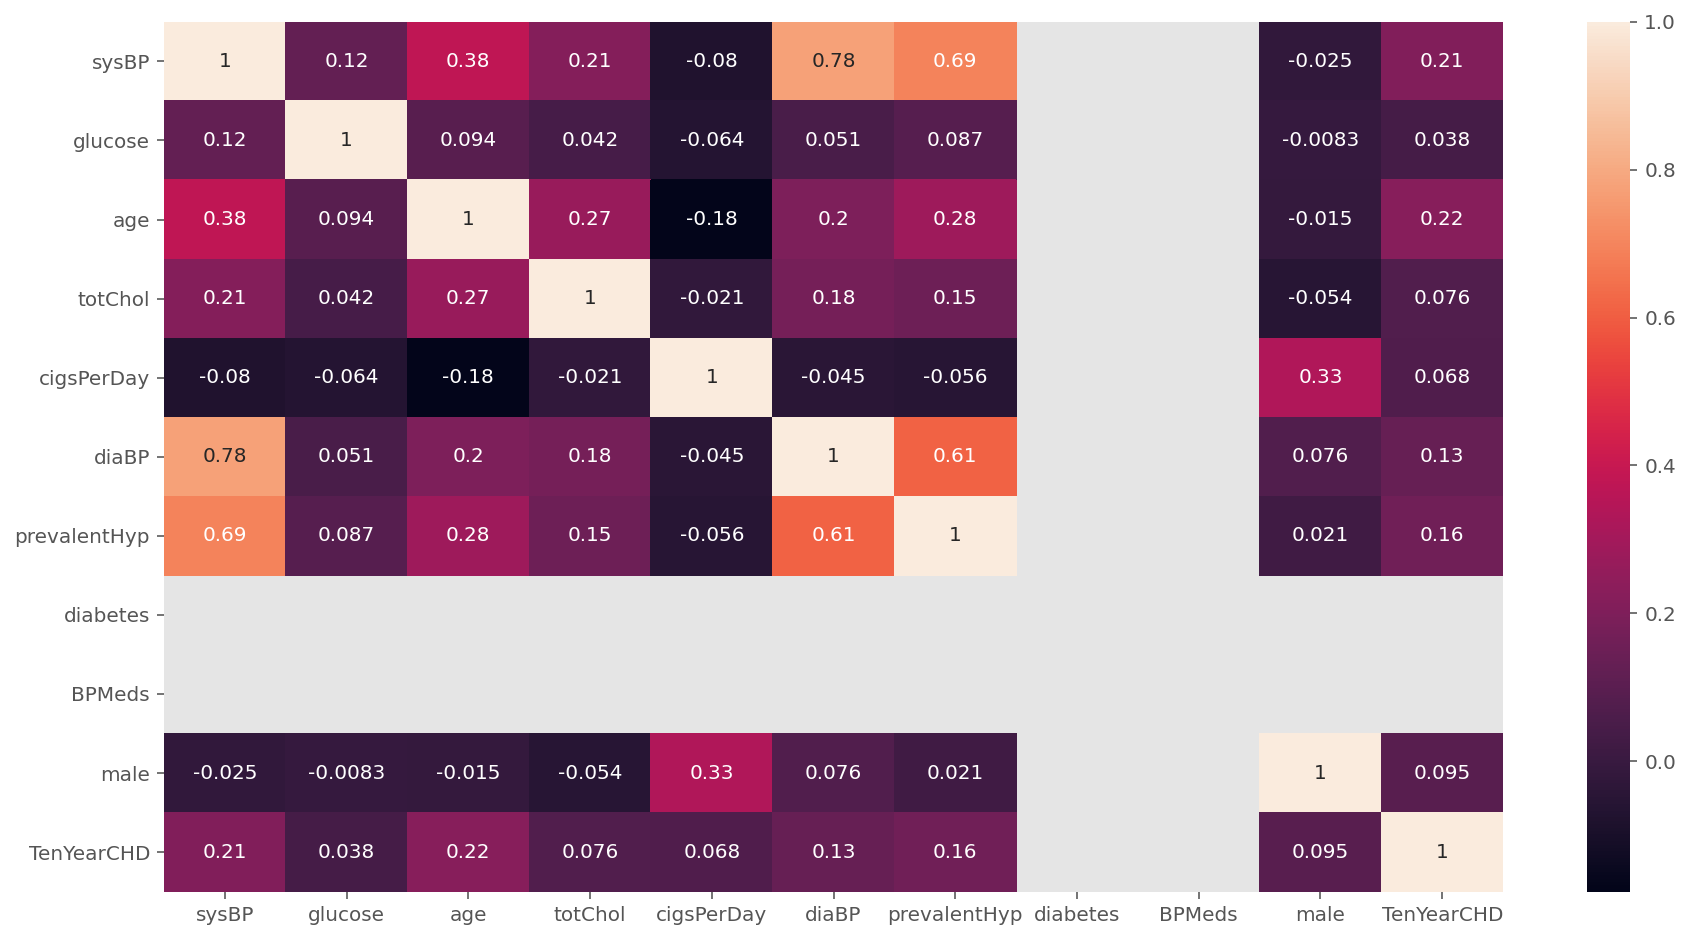

In [149]:
# Checking correlation again
plt.figure(figsize=(15,8))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)

In [150]:
# Checking for outliers
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3432.000000  3432.000000  3432.000000  3432.000000  3432.000000   
mean    130.885927    79.348193    49.173368   235.781469     9.207168   
std      20.607716    12.747588     8.480228    43.139097    11.974832   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     116.000000    71.000000    42.000000   205.000000     0.000000   
50%     127.500000    77.000000    48.000000   233.000000     0.000000   
75%     142.000000    86.000000    56.000000   262.000000    20.000000   
max     232.000000   142.000000    69.000000   453.000000    60.000000   

             diaBP  prevalentHyp  diabetes  BPMeds         male   TenYearCHD  
count  3432.000000   3432.000000    3432.0  3432.0  3432.000000  3432.000000  
mean     82.334353      0.282634       0.0     0.0     0.446970     0.140152  
std      11.527559      0.450346       0.0     0.0     0.497252     0.347195  
min      48.000000      0.000000       0.0     0.0     0.000000     0.000000  
25%      74.000000      0.000000       0.0     0.0     0.000000     0.000000  
50%      81.000000      0.000000       0.0     0.0     0.000000     0.000000  
75%      89.000000      1.000000       0.0     0.0     1.000000     0.000000  
max     136.000000      1.000000       0.0     0.0     1.000000     1.000000

Empty DataFrame
Columns: [sysBP, glucose, age, totChol, cigsPerDay, diaBP, prevalentHyp, diabetes, BPMeds, male, TenYearCHD]
Index: []

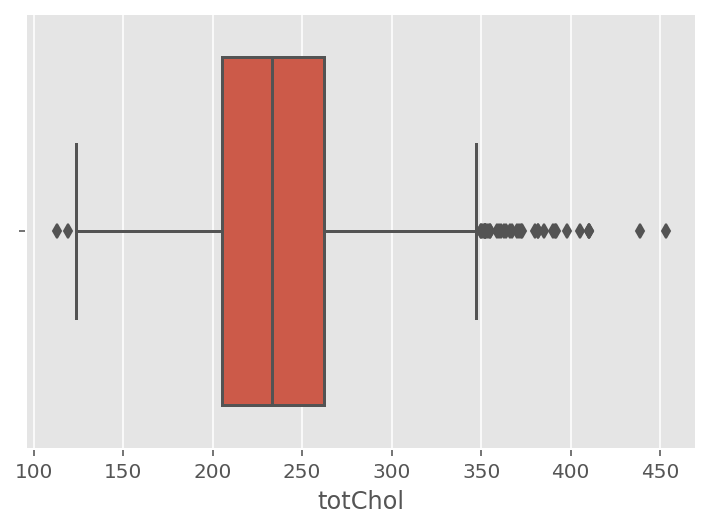

In [151]:
# Zooming into cholesterin outliers
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

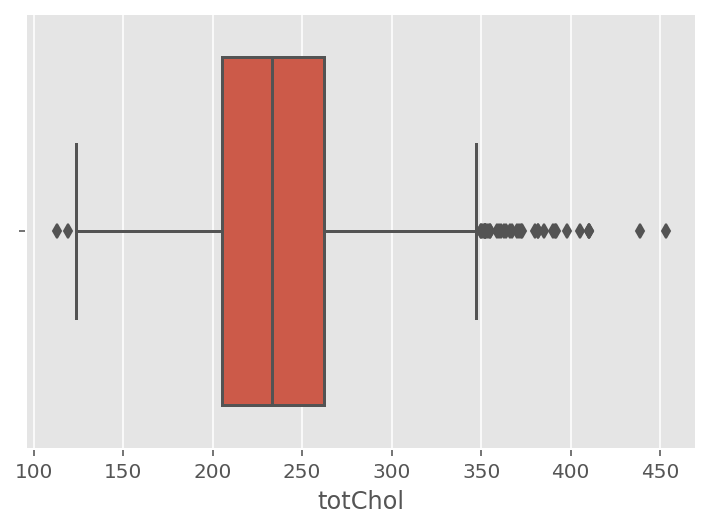

In [152]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [153]:
df_clean = df

# Feature Scaling

Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [154]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [155]:
df_scaled.describe()
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3432.000000  3432.000000  3432.000000  3432.000000  3432.000000   
mean      0.319097     0.385767     0.464145     0.361122     0.153453   
std       0.138772     0.124976     0.229195     0.126880     0.199581   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.218855     0.303922     0.270270     0.270588     0.000000   
50%       0.296296     0.362745     0.432432     0.352941     0.000000   
75%       0.393939     0.450980     0.648649     0.438235     0.333333   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp  diabetes  BPMeds         male   TenYearCHD  
count  3432.000000   3432.000000    3432.0  3432.0  3432.000000  3432.000000  
mean      0.390163      0.282634       0.0     0.0     0.446970     0.140152  
std       0.130995      0.450346       0.0     0.0     0.497252     0.347195  
min       0.000000      0.000000       0.0     0.0     0.000000     0.000000  
25%       0.295455      0.000000       0.0     0.0     0.000000     0.000000  
50%       0.375000      0.000000       0.0     0.0     0.000000     0.000000  
75%       0.465909      1.000000       0.0     0.0     1.000000     0.000000  
max       1.000000      1.000000       0.0     0.0     1.000000     1.000000

sysBP      glucose          age      totChol   cigsPerDay  \
count  3432.000000  3432.000000  3432.000000  3432.000000  3432.000000   
mean    130.885927    79.348193    49.173368   235.781469     9.207168   
std      20.607716    12.747588     8.480228    43.139097    11.974832   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     116.000000    71.000000    42.000000   205.000000     0.000000   
50%     127.500000    77.000000    48.000000   233.000000     0.000000   
75%     142.000000    86.000000    56.000000   262.000000    20.000000   
max     232.000000   142.000000    69.000000   453.000000    60.000000   

             diaBP  prevalentHyp  diabetes  BPMeds         male   TenYearCHD  
count  3432.000000   3432.000000    3432.0  3432.0  3432.000000  3432.000000  
mean     82.334353      0.282634       0.0     0.0     0.446970     0.140152  
std      11.527559      0.450346       0.0     0.0     0.497252     0.347195  
min      48.000000      0.000000       0.0     0.0     0.000000     0.000000  
25%      74.000000      0.000000       0.0     0.0     0.000000     0.000000  
50%      81.000000      0.000000       0.0     0.0     0.000000     0.000000  
75%      89.000000      1.000000       0.0     0.0     1.000000     0.000000  
max     136.000000      1.000000       0.0     0.0     1.000000     1.000000

# Test - Train Split 


In [156]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

In [157]:
len(X_train)

2059

In [158]:
len(X_test)

1373

# Resampling imbalanced Dataset

Class 0: 2951
Class 1: 481
Proportion: 6.14 : 1


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

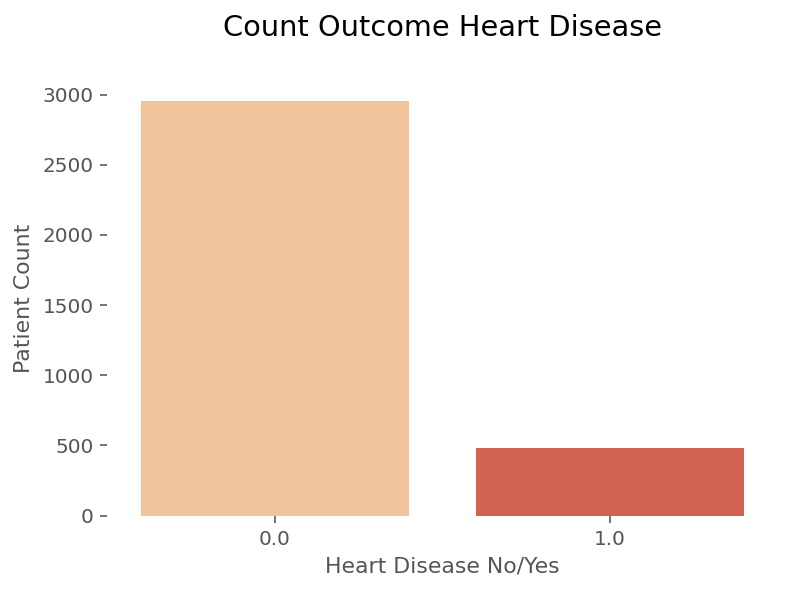

In [159]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

0.0    611
1.0    481
Name: TenYearCHD, dtype: int64

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

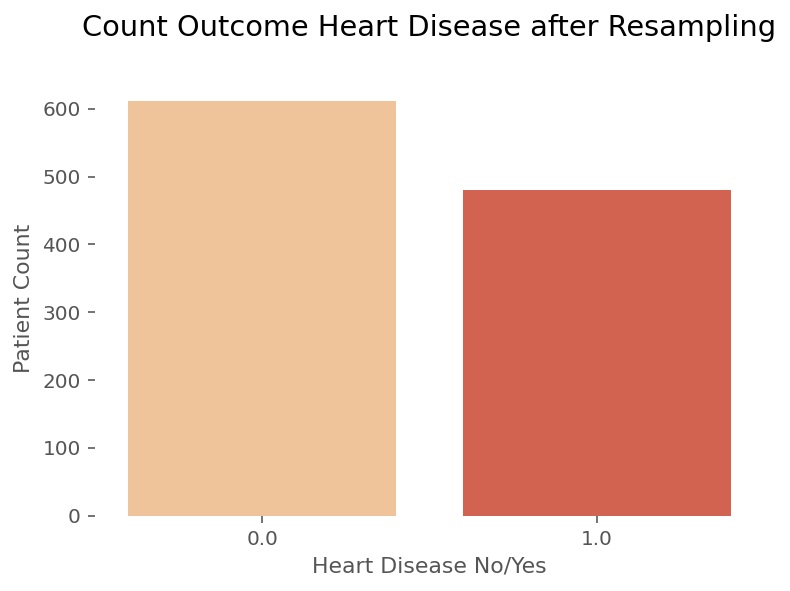

In [160]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

# Model Pipeline

In [161]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 72.91%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 75.38%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 72.98%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 82.01%


# Modelling & Evaluation (without Pipeline)

# 1. Logistic Regression

In [162]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 72.89999999999999%
The f1 score for LogReg is: 39.800000000000004%
The precision score for LogReg is: 29.9%
The recall score for LogReg is: 59.4%


# 2. SVM

In [163]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

SVC()

The accuracy score for SVM is: 75.4%
The f1 score for SVM is: 40.300000000000004%
The precision score for SVM is: 31.8%
The recall score for SVM is: 55.1%


# 3. Decision Tree

In [164]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 72.0%
The f1 score for DTC is: 51.800000000000004%
The precision score for DTC is: 35.0%
The recall score for DTC is: 100.0%


# 4. Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20).fit(X_train,y_train)

In [166]:
normalized_rf_pred = rf.predict(X_test)

In [167]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_rf_pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_rf_pred)
print(f"The f1 score for RFC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_rf_pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_rf_pred)
print(f"The recall score for RFC is: {round(recall,3)*100}%")

The accuracy score for RFC is: 81.10000000000001%
The f1 score for RFC is: 61.0%
The precision score for RFC is: 44.2%
The recall score for RFC is: 98.1%


# 5. KNN

In [168]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 3)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"\nThe accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=3)


The accuracy score for KNN is: 72.8%
The f1 score for KNN is: 44.2%
The precision score for KNN is: 32.0%
The recall score for KNN is: 71.5%


# Result

# Random forest has the best F1 Score

In [169]:
# Perform cross validation

cv_results = cross_val_score(rf, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.84716157 0.84425036 0.85860058 0.86005831 0.84985423]
The Accuracy of Model with Cross Validation is: 85.20%


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE RANDOM FOREST')

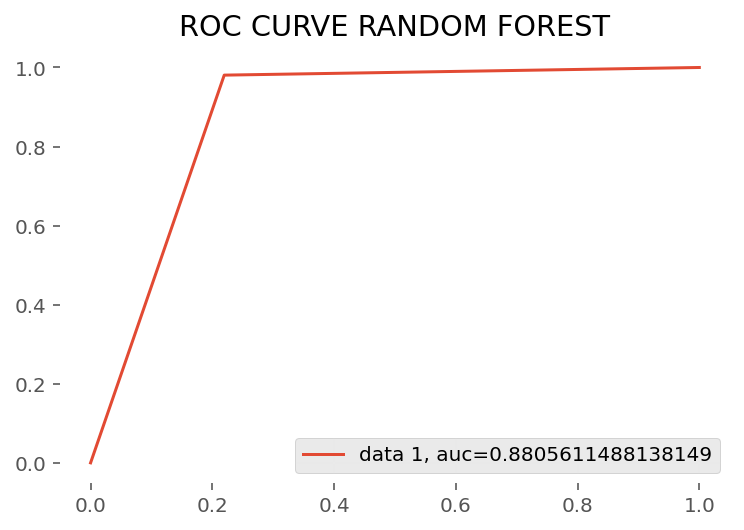

The score for the AUC ROC Curve is: 88.1%


In [170]:
# AU ROC CURVE RANDOM FOREST
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_rf_pred)
auc = roc_auc_score(y_test, normalized_rf_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE RANDOM FOREST')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

# Conclusion


- Based on F1 score, cross validation score and AUC-ROC score random forest performs the best